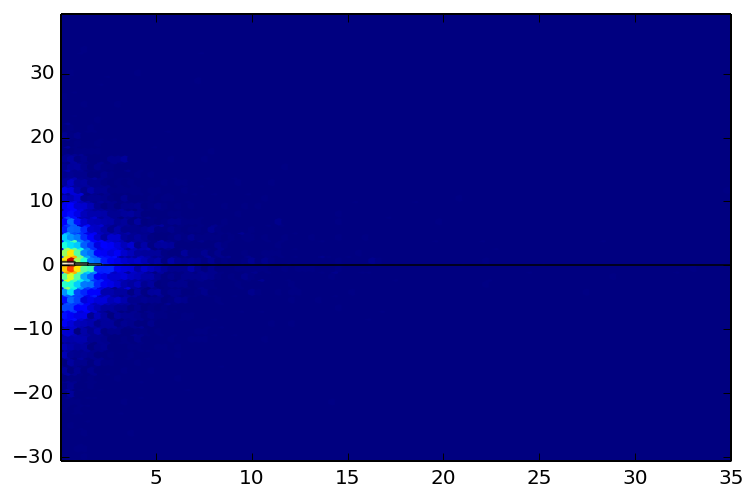

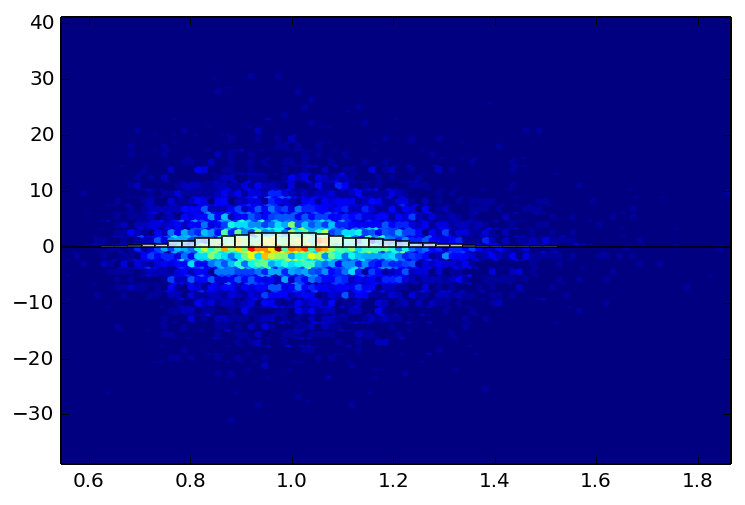

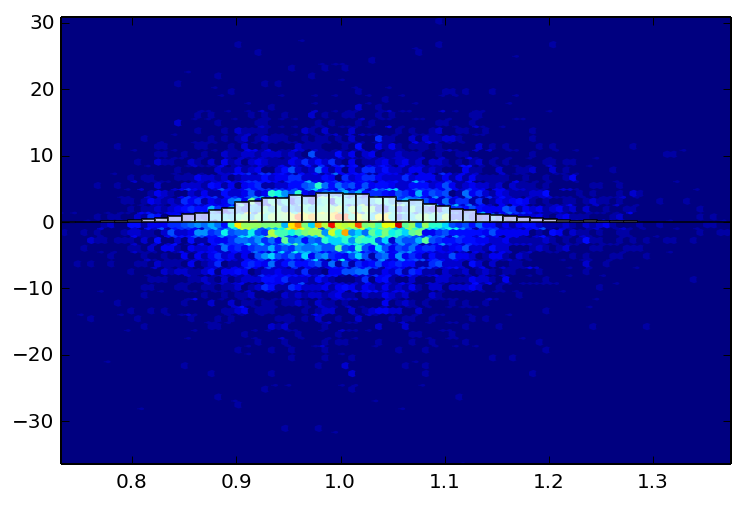

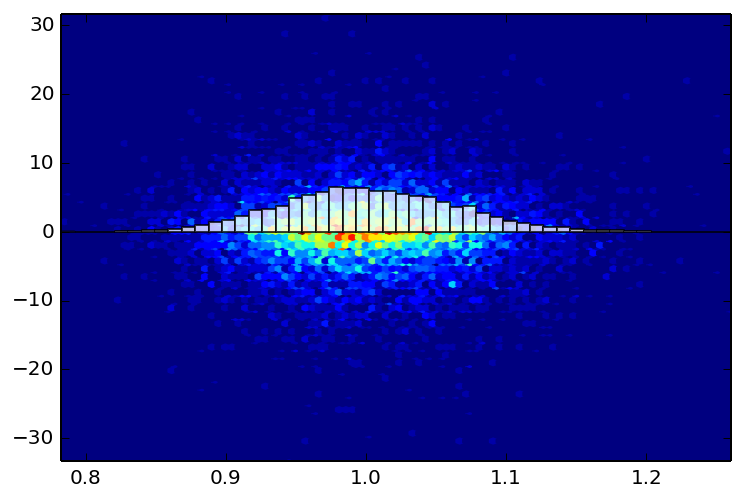

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

n = 10000
for stuff in range(1,20,5):
    x = np.random.lognormal(0,1/(1.0*stuff),n)
    y = np.random.laplace(0,4,n)

    ns, bins, patches = plt.hist(x, 50, normed=1, facecolor='w', alpha=0.75)

    plt.figure(1)
    plt.hexbin(x,y)
    plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


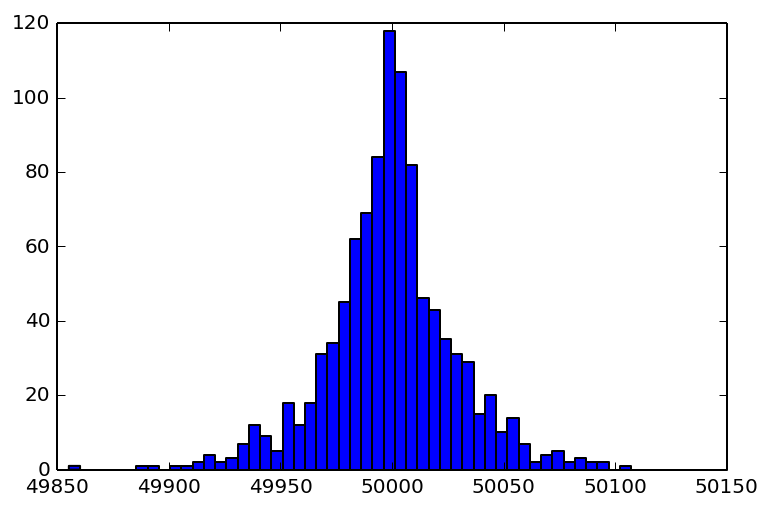

In [2]:
import numpy as np
import matplotlib.pyplot as plt
for stuff in range(10,11):
    n , p , num = 5000.0*stuff , 2*stuff , 1000.0
    x = np.random.laplace(n,p,num)
    n, bins, patches = plt.hist(x, 50, normed=0, facecolor='b', alpha=1)
    plt.show()

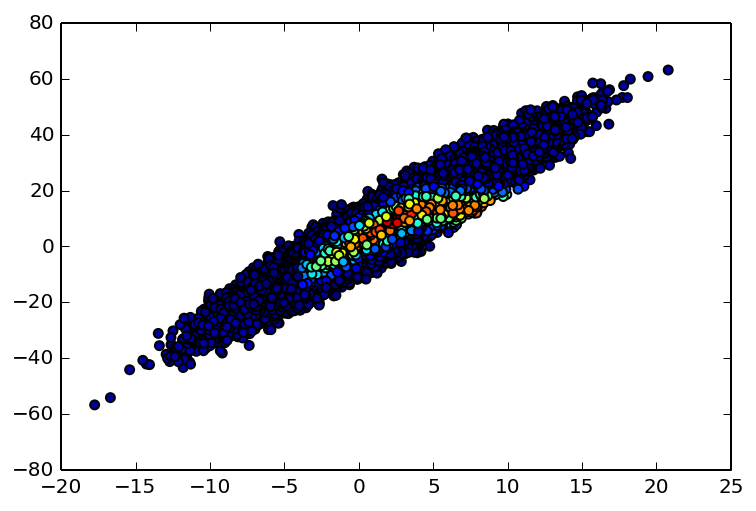

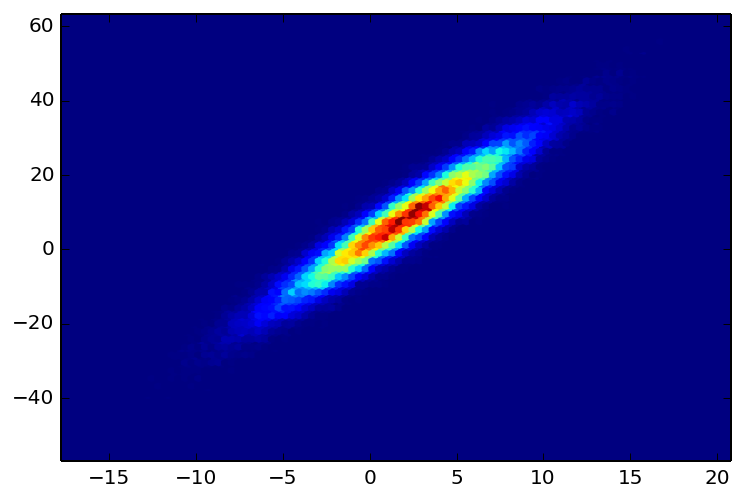

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

n = 100000
x = 2.0 + 4.0 * np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xedges, yedges = np.linspace(-4, 4, 42), np.linspace(-25, 25, 42)
hist, xedges, yedges = np.histogram2d(x, y, (xedges, yedges))
xidx = np.clip(np.digitize(x, xedges), 0, hist.shape[0])-1
yidx = np.clip(np.digitize(y, yedges), 0, hist.shape[1])-1
c = hist[xidx, yidx]
#plt.xkcd()
plt.figure(1)
plt.scatter(x, y,c=c)

plt.figure(2)
plt.hexbin(x,y)

plt.show()

In [4]:
import ROOT
import rootnotes
from ROOT import TH1F
import numpy as np
c1 = rootnotes.default_canvas()

ImportError: No module named ROOT

In [ ]:
from ROOT import TF1
import rootnotes
import numpy as np
import time
c1 = rootnotes.default_canvas()
#
h1 = TH1F( "h1name", "title", 100, -10, 10 )
for rand in np.random.standard_normal(10000):
    h1.Fill(rand)
    h1.Draw()
#
c1

In [ ]:
from ROOT import gRandom,TCanvas,TH1F

c1 = TCanvas('c1','Example',200,10,700,500)
hpx = TH1F('hpx','px',100,-4,4)

for i in xrange(25000):
px = gRandom.Gaus()
hpx.Fill(px)

hpx.Draw()
c1.Update()

In [ ]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import ROOT
import rootnotes
import numpy as np
from ROOT import TLorentzVector
from ROOT import gRandom,TCanvas,TH1F,TH2F
from tools import ProgressBar
c1 = TCanvas('c1','Example',200,10,700,500)

In [ ]:
energy = 4.802
MASS_P = 0.93827203
nrep = 250000
e_mu = TLorentzVector(0,0,energy,energy)
p_mu = TLorentzVector(0,0,0,MASS_P)
e_mu_prime = TLorentzVector()
q_mu = TLorentzVector()

randomHist = TH1F('randomHist','%%',200,-40,40)
Q2 = []
W = []
E = []
bar  = ProgressBar(nrep,'More Power!!')

##More random stuff
E_rand = np.random.laplace(0.1,0.9,nrep)
pz = np.random.laplace(0.1,1,nrep)
###

for i in xrange(nrep):
    bar.animate(i+1)
    ##just random stuff for now
    e_mu_prime.SetPx(gRandom.Gaus())
    e_mu_prime.SetPy(gRandom.Gaus())
    e_mu_prime.SetPz(pz[i])
    E.append(abs(E_rand[i]))
    e_mu_prime.SetE(E[i]) 
    #######
    q_mu = e_mu-e_mu_prime
    Q2.append(-(q_mu.Mag2()))
    W.append((p_mu + q_mu).M())
    

#ns, bins, patches = plt.hist(Q2, 50, normed=1, facecolor='w', alpha=0.75)
plt.figure(1)
plt.hexbin(W,Q2)

plt.figure(2)
plt.hist(W, 50,normed=1, facecolor='b', alpha=0.90 )

plt.figure(3)
plt.hist(Q2, 50,normed=1, facecolor='b', alpha=0.90 )

plt.figure(4)
plt.hist(E, 50,normed=1, facecolor='b', alpha=0.90 )
plt.show()